In [290]:
import tensorflow as tf
import keras as k
import nibabel as nb
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt

In [291]:
trainf=[]
for file_name in os.listdir(r'trainf'):
    if fnmatch.fnmatch(file_name, '*.nii'):
      trainf.append(nb.load(r"trainf/"+file_name) )
      print(file_name)

IRM1.nii
IRM10.nii
IRM18.nii


In [292]:
labelf=[]
for file_name in os.listdir(r'labelf'):
     if fnmatch.fnmatch(file_name, '*.nii'):

        labelf.append(nb.load(r"labelf/"+file_name) )
        print(file_name)

IRM1.nii
IRM10.nii
IRM18.nii


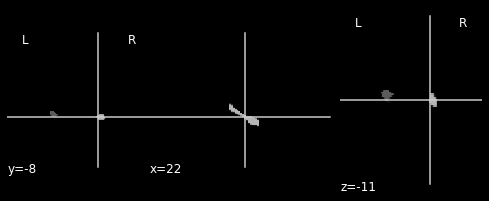

In [293]:

from nilearn import plotting
plotting.plot_anat(labelf[0])

In [294]:
for i in range (3):
    trainf[i] = nb.Nifti1Image(trainf[i].get_data().astype(np.float64), trainf[i].affine)
    labelf[i] = nb.Nifti1Image(labelf[i].get_data().astype(np.float64), labelf[i].affine)

<ipython-input-294-e096352afbc8>:2: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0

<ipython-input-294-e096352afbc8>:3: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0



In [295]:
type(trainf[1].get_data()[1][1][1][0])

<ipython-input-295-fd59ea25754a>:1: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0



numpy.float64

In [296]:
from nilearn import image as nl
for i in range (0,3):
    labelf[i]=nl.resample_img(trainf[i],labelf[i].affine,(256,256,256))
    trainf[i]=nl.resample_img(trainf[i],trainf[i].affine,(256,256,256))
    print(i)

0
1
2


In [297]:
#splitting data
#from sklearn.model_selection import train_test_split
#x_train, x_val, y_train, y_val = train_test_split(trainf, labelf, test_size=0.3)

In [298]:
trainf[2].shape

(256, 256, 256, 1)

In [299]:
 #%pip install -qU "monai[nibabel]==0.3.0rc2"

In [300]:
import glob
import logging
import os
import shutil
import sys
import tempfile

import catalyst.dl
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from monai.config import print_config
from monai.data import Dataset, create_test_image_3d, list_data_collate
from monai.inferers import sliding_window_inference
from monai.losses import DiceLoss
from monai.metrics import DiceMetric
from monai.networks.nets import UNet
from monai.transforms import (
    Activations,
    AsChannelFirstd,
    AsDiscrete,
    Compose,
    LoadImaged,
    RandCropByPosNegLabeld,
    RandRotate90d,
    ScaleIntensityd,
    ToTensor,
)
from monai.utils import first

import torch

print_config()

MONAI version: 0.5.2
Numpy version: 1.19.5
Pytorch version: 1.7.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False
MONAI rev id: feb3a334b7bbf302b13a6da80e0b022a4cf75a4e

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 3.2.1
scikit-image version: 0.16.2
Pillow version: 7.2.0
Tensorboard version: 2.4.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.8.2
ITK version: NOT INSTALLED or UNKNOWN VERSION.
tqdm version: 4.47.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.7.0

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies



In [301]:
#from monai.transforms import LoadNifti

In [302]:
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)


C:\Users\msi\AppData\Local\Temp\tmpgq7413gq


In [303]:
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [304]:
#for i in range (23):
 #   trainf[i]=trainf[i].get_fdata()
  #  labelf[i]=labelf[i].get_fdata()

In [305]:
for i in range(3):
    X=trainf[i].get_data()[:,:,:,0]
    trainf[i] = nb.Nifti1Image(X, trainf[i].affine)
    Y=labelf[i].get_data()[:,:,:,0]
    labelf[i] = nb.Nifti1Image(Y, trainf[i].affine)
    

<ipython-input-305-f55d2f8494d2>:2: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0

<ipython-input-305-f55d2f8494d2>:4: DeprecationWarning:

get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0



In [306]:
trainf[1].shape

(256, 256, 256)

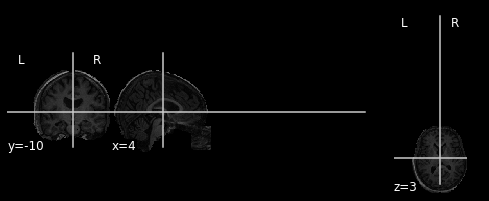

In [307]:
from nilearn import plotting
plotting.plot_anat(trainf[1])

In [308]:
import torchvision

In [309]:
from torchvision import transforms as transforms

for i in range(3):
    trainf[i]=torch.from_numpy(trainf[i].dataobj).float()
    labelf[i]=torch.from_numpy(labelf[i].dataobj).float()


In [310]:
trainf[2]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [311]:
for i in range(3):
    trainf[i]=torch.unsqueeze(trainf[i], 0)
    labelf[i]=torch.unsqueeze(labelf[i], 0)

In [312]:
for i in range(3):
    print(trainf[i].shape,labelf[i].shape)

torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])
torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])
torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])


In [313]:
train_files = [
    {"img": img, "seg": seg} for img, seg in zip(trainf[:20], labelf[:20])
]
val_files = [
    {"img": img, "seg": seg} for img, seg in zip(trainf[-3:], labelf[-3:])
]


In [314]:
train_transforms = Compose(
    [
    ]
)
val_transforms = Compose(
    [
    ]
)


In [315]:

# define dataset, data loader
check_ds = Dataset(data=train_files, transform=train_transforms)
# use batch_size=2 to load images and use RandCropByPosNegLabeld to generate 2 x 4 images for network training
check_loader = torch.utils.data.DataLoader(
    check_ds, batch_size=2, num_workers=0, collate_fn=list_data_collate
)
check_data = first(check_loader)
print(check_data["img"].shape, check_data["seg"].shape)



torch.Size([2, 1, 256, 256, 256]) torch.Size([2, 1, 256, 256, 256])


In [316]:
# create a training data loader
train_ds = Dataset(data=train_files, transform=train_transforms)
# use batch_size=2 to load images and use RandCropByPosNegLabeld to generate 2 x 4 images for network training
train_loader = torch.utils.data.DataLoader(
    train_ds,
    batch_size=1,
    shuffle=True,
    num_workers=4,
    collate_fn=list_data_collate,
    pin_memory=torch.cuda.is_available(),
)
# create a validation data loader
# create a validation data loader
val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = torch.utils.data.DataLoader(
    val_ds, batch_size=2, num_workers=0, collate_fn=list_data_collate
)

In [317]:
# create UNet, DiceLoss and Adam optimizer
# device = torch.device("cuda:0")  # you don't need device, because Catalyst uses autoscaling
model = UNet(
    dimensions=3,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
)


In [318]:

loss_function = DiceLoss(sigmoid=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-3)

dice_metric = DiceMetric(include_background=True, reduction="mean")
post_trans = Compose(
    [Activations(sigmoid=True), AsDiscrete(threshold_values=True)]
)

In [319]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [320]:
from torchvision import models
from torchsummary import summary

vgg = models.vgg16()
summary(vgg, (3,256,256))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
              ReLU-2         [-1, 64, 256, 256]               0
            Conv2d-3         [-1, 64, 256, 256]          36,928
              ReLU-4         [-1, 64, 256, 256]               0
         MaxPool2d-5         [-1, 64, 128, 128]               0
            Conv2d-6        [-1, 128, 128, 128]          73,856
              ReLU-7        [-1, 128, 128, 128]               0
            Conv2d-8        [-1, 128, 128, 128]         147,584
              ReLU-9        [-1, 128, 128, 128]               0
        MaxPool2d-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 256, 64, 64]         295,168
             ReLU-12          [-1, 256, 64, 64]               0
           Conv2d-13          [-1, 256, 64, 64]         590,080
             ReLU-14          [-1, 256,

In [321]:
class MonaiSupervisedRunner(catalyst.dl.SupervisedRunner):
    def forward(self, batch):
        if self.is_train_loader:
            output = {self.output_key: self.model(batch[self.input_key])}
        elif self.is_valid_loader:
            roi_size = (256, 256, 256)
            sw_batch_size = 1
            output = {
                self.output_key: sliding_window_inference(
                    batch[self.input_key], roi_size, sw_batch_size, self.model
                )
            }
        elif self.is_infer_loader:
            roi_size = (256, 256, 256)
            sw_batch_size = 1
            batch = self._batch2device(batch, self.device)
            output = {
                self.output_key: sliding_window_inference(
                    batch[self.input_key], roi_size, sw_batch_size, self.model
                )
            }
            output = {**output, **batch}
        return output

In [328]:
max_epochs = 2
val_interval = 2
log_dir = os.path.join(root_dir, "logs")
runner = MonaiSupervisedRunner(
    input_key="img", input_target_key="seg", output_key="logits"
)  

In [329]:
for i in range(3):
    print(trainf[i].shape,labelf[i].shape)

torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])
torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])
torch.Size([1, 256, 256, 256]) torch.Size([1, 256, 256, 256])


In [330]:
runner.train(
    loaders={"train": train_loader, "valid": val_loader},
    model=model,
    criterion=loss_function,
    optimizer=optimizer,
    num_epochs=max_epochs,
    logdir=log_dir,
    main_metric="dice_metric",
    minimize_metric=False,
    verbose=False,
    timeit=True,  # let's use minimal logs, but with time checkers
    callbacks={
        "loss": catalyst.dl.CriterionCallback(
            input_key="seg", output_key="logits"
        ),
        "periodic_valid": catalyst.dl.PeriodicLoaderCallback(
            valid=val_interval
        ),
        "dice_metric": catalyst.dl.MetricCallback(
            prefix="dice_metric",
            metric_fn=lambda y_pred, y: dice_metric(post_trans(y_pred),torch.where(y>0.5 ,1,0))[0],
            input_key="seg",
            output_key="logits",
        ),
    },
    load_best_on_end=True,  # user-friendly API :)
)

[2021-04-29 00:53:22,237] 
1/2 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/2 * Epoch 1 (train): _timer/_fps=0.1096 | _timer/batch_time=9.9212 | _timer/data_time=6.7006 | _timer/model_time=3.2207 | dice_metric=-inf | loss=-6.798e-01
[2021-04-29 00:53:22,237] 
1/2 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/2 * Epoch 1 (train): _timer/_fps=0.1096 | _timer/batch_time=9.9212 | _timer/data_time=6.7006 | _timer/model_time=3.2207 | dice_metric=-inf | loss=-6.798e-01
[2021-04-29 00:53:22,237] 
1/2 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/2 * Epoch 1 (train): _timer/_fps=0.1096 | _timer/batch_time=9.9212 | _timer/data_time=6.7006 | _timer/model_time=3.2207 | dice_metric=-inf | loss=-6.798e-01
[2021-04-29 00:53:22,237] 
1/2 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/2 * Epoch 1 (train): _timer/_fps=0.1096 | _timer/batch_time=9.9212 | _timer/data_time=6.7006 | _timer/model_time=3.2207 | dice_metric=-inf | loss=-6.798e-01
[2021-04-29 00:53:22,237] 
1/2 * Epoch 1 (_base): lr

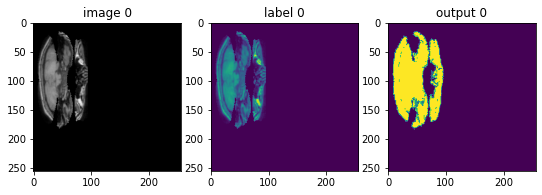

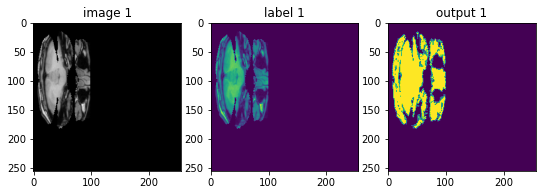

In [331]:
for i, valid_output in enumerate(runner.predict_loader(loader=val_loader)):
    if i > 4:
        break
    plt.figure("check", (9, 3))
    plt.subplot(1, 3, 1)
    plt.title("image " + str(i))
    plt.imshow(valid_output["img"].detach().cpu()[0, 0, :, :, 48], cmap="gray")
    plt.subplot(1, 3, 2)
    plt.title("label " + str(i))
    plt.imshow(valid_output["seg"].detach().cpu()[0, 0, :, :, 48])
    plt.subplot(1, 3, 3)
    plt.title("output " + str(i))
    logits = valid_output["logits"]
    plt.imshow((logits[0] > 0.5).float().detach().cpu()[0, :, :, 48])
    plt.show()